## <img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Part 2 - Exploratory Data Analysis
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Numerical Columns](#Numerical-Columns)
- [Text Columns](#Text-Columns)

## Import Libraries

In [1]:
# Basic imports
import pandas as pd
import numpy as np


# Time
import time
from datetime import datetime

# Visualisation 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import collections
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data Processing 
import re
import string
import nltk


# Vectorizing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', None)
pd.set_option('display.width', None)

## Load Data

In [2]:
df = pd.read_csv('../data/clean_df.csv')

In [3]:
df.head()

,vaers_id,age_yrs,sex,symptom_text,died,l_threat,hospital,hospdays,x_stay,disable,recovd,numdays,v_adminby,other_meds,history,form_vers,birth_defect,er_ed_visit,allergies,symptom1,symptom2,symptom3,symptom4,symptom5,vax_type,vax_manu,vax_dose_series,vax_route,vax_site,vax_name,serious,ime
0,916612.0,71.0,F,Left side of face became numb including to beh...,0.0,0.0,0.0,0.0,0.0,0.0,U,0.0,PVT,levothyroxine mcg day estradiol mg day,Graves Disease,2.0,0.0,0.0,penicillin toradol methimazole,Ear pain,Hypoaesthesia,NaN,NaN,NaN,COVID19,MODERNA,0,IM,LA,COVID19 (COVID19 (MODERNA)),0,0
1,916641.0,44.0,F,Vertigo every evening when lying down and ever...,0.0,0.0,0.0,0.0,0.0,0.0,N,0.0,PVT,multivitamin D baby aspirin,none,2.0,0.0,0.0,latex sulfa drugs,Vertigo,NaN,NaN,NaN,NaN,COVID19,MODERNA,0,IM,RA,COVID19 (COVID19 (MODERNA)),0,0
2,916702.0,70.0,F,body aches and stomach ache,0.0,0.0,0.0,0.0,0.0,0.0,N,31.0,PVT,Triamterene HCTZ Montelukast Celecoxib Aller T...,asthma when I get a cold,2.0,0.0,0.0,too much cordosone,Abdominal pain upper,Pain,NaN,NaN,NaN,COVID19,MODERNA,0,SYR,UN,COVID19 (COVID19 (MODERNA)),0,0
3,917195.0,47.0,F,H a diarrhea SEVERE joint pain all through bo...,0.0,0.0,0.0,0.0,0.0,0.0,N,0.0,PVT,None,Serious episode of covid,2.0,0.0,0.0,None,Arthralgia,Chills,Diarrhoea,Fatigue,Nausea,COVID19,MODERNA,0,UN,RA,COVID19 (COVID19 (MODERNA)),0,0
4,917195.0,47.0,F,H a diarrhea SEVERE joint pain all through bo...,0.0,0.0,0.0,0.0,0.0,0.0,N,0.0,PVT,None,Serious episode of covid,2.0,0.0,0.0,None,Pyrexia,NaN,NaN,NaN,NaN,COVID19,MODERNA,0,UN,RA,COVID19 (COVID19 (MODERNA)),0,0


In [4]:
df.describe()

,vaers_id,age_yrs,died,l_threat,hospital,hospdays,x_stay,disable,numdays,form_vers,birth_defect,er_ed_visit,vax_dose_series,serious,ime
count,5.433230e+05,543323.000000,543323.000000,543323.000000,543323.000000,543323.000000,543323.000000,543323.000000,543323.000000,543323.0,543323.000000,543323.000000,543323.000000,543323.000000,543323.000000
mean,1.286160e+06,49.094378,0.013596,0.024567,0.086352,2.214077,0.000548,0.023748,9.474718,2.0,0.000698,0.174136,0.006094,0.187382,0.126785
std,2.187617e+05,18.364745,0.115806,0.154803,0.280883,429.010969,0.023413,0.152264,27.454649,0.0,0.026402,0.379227,0.077826,0.390218,0.332732
min,9.166120e+05,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.104524e+06,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.267431e+06,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.464186e+06,63.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2.0,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.771166e+06,119.000000,1.000000,1.000000,1.000000,99999.000000,1.000000,1.000000,382.000000,2.0,1.000000,1.000000,1.000000,1.000000,1.000000


**Observations:**
- Average age of patients experiencing AEs is 49 years old. The youngest patient was < 1 year old while the oldest patient was 119 years old.

## Exploratory Data Analysis

In [5]:
# Update serious column for visualisation
df['serious'] = df['serious'].map({0:'non-serious', 1:'serious'})

#### Look at distribution of case severity

Text(0.5, 1.0, 'Number of AE reports split by Seriousness')

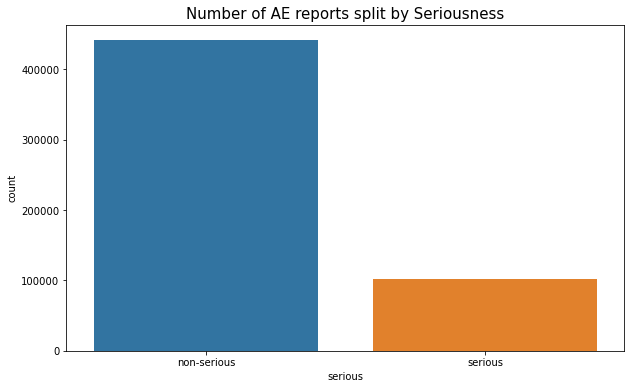

In [6]:
# Distribution of case severity
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='serious')
plt.title('Number of AE reports split by Seriousness', fontsize=15)

In [7]:
df['serious'].value_counts(normalize=True)

non-serious    0.812618
serious        0.187382
Name: serious, dtype: float64

18.7% of the dataset comprises of serious AE and 81.3% of non-serious AE.

#### Heatmap of features

To allow easy interpretion of heatmap, features with low correlation (any correlation < 0.5) will be masked.

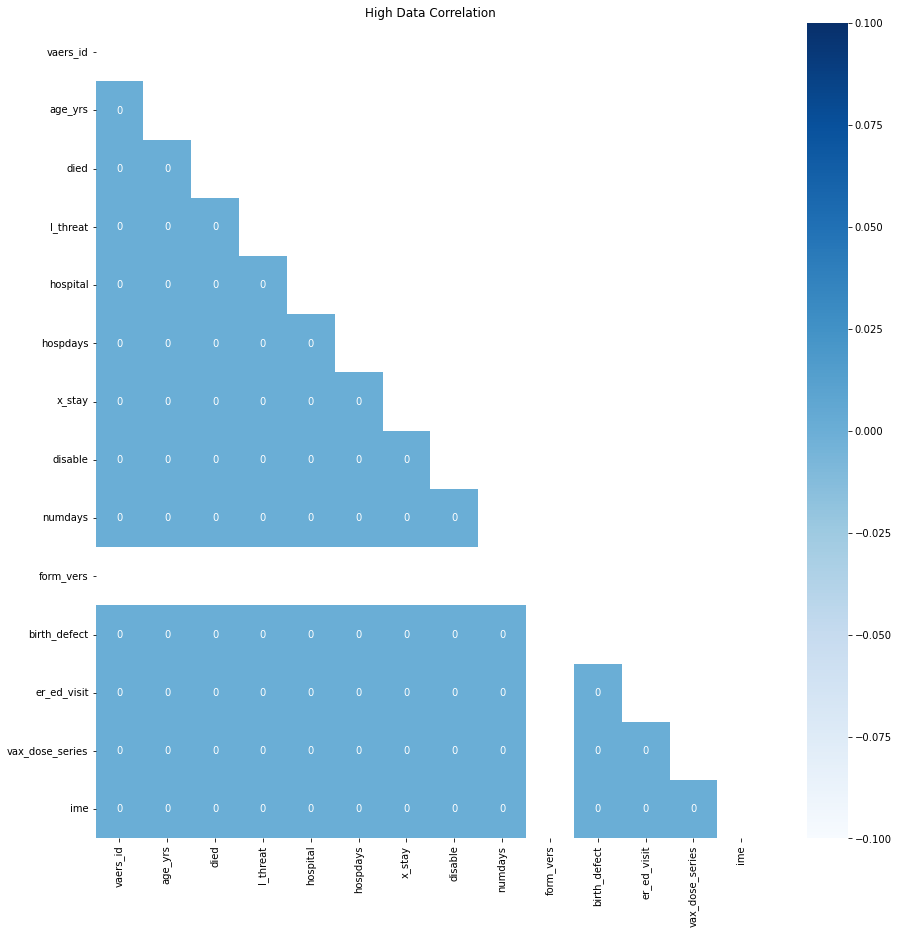

In [8]:
# Heatmap of all features
correlations = df.corr()

# Mask features that have low correlation (correlations < 0.5)
correlations[(np.abs(correlations)<.5)] = 0
plt.figure(figsize=(15,15))

custom_mask = np.zeros_like(correlations.corr())   
custom_mask[np.triu_indices_from(custom_mask)] = True  

sns.heatmap(correlations,annot=True, mask=custom_mask, cmap='Blues').set_title("High Data Correlation");

Since all the features from the dataset have correlation < 0.5, there is no colinearlity between features.

### Numerical Columns

#### Age

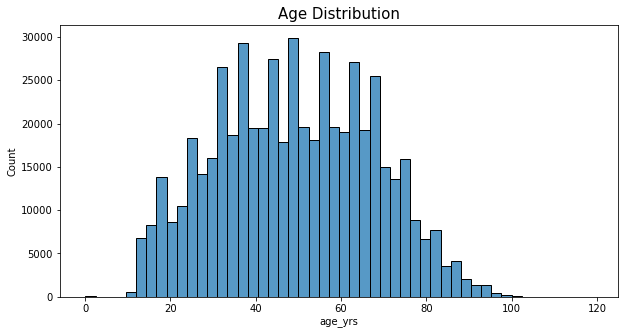

In [9]:
plt.figure(figsize=(10,5))
sns.histplot(df['age_yrs'], bins=50)
plt.title('Age Distribution', fontsize=15);

The age range spans from 10-100+ years old with the bulk of reports clustering between 20-70 years old. We are unable to see the peak as there are multiple peaks in the graph. We will look into the breakdown between serious and non-serious AE in terms of age below.

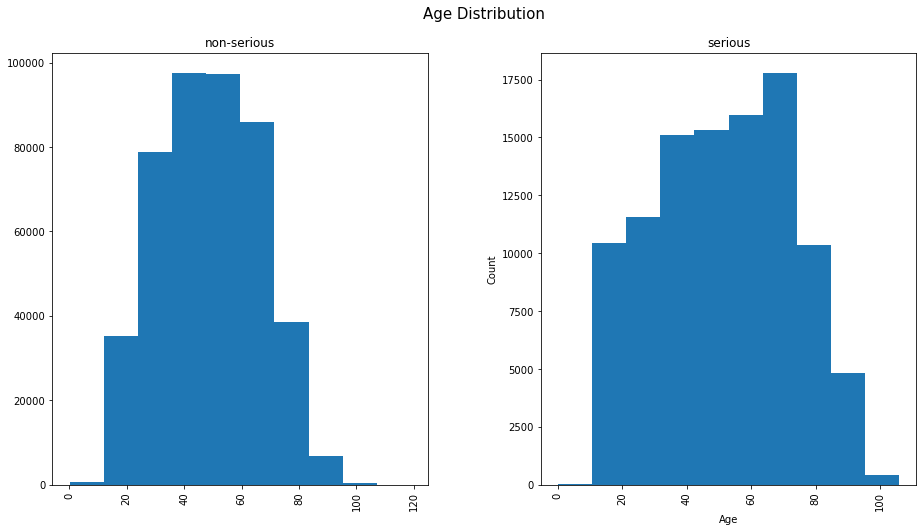

In [10]:
# Distribution of adverse event severity based on age
df['age_yrs'].hist(by=df['serious'], figsize=(15,8))
plt.xlabel('Age')
plt.ylabel('Count')
plt.suptitle('Age Distribution', fontsize=15);

Non-serious AE tend to affect the same age range (20-70 year olds) as the combined graph with a normal distribution peaking at 30-60 year olds. For serious AE, we find a similar age range with a left-skew and the peak at 70-80 years old. This is expected as we find that older individuals tend to experience more serious AE as compared to their younger counterparts ([source](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8326508/)).

In [11]:
# Check number of patients vaccinated under the age of 18
# At the point of data collection, the vaccine was not recommended for persons under 18
df.age_yrs[df['age_yrs'] < 18].count()

21903

In [12]:
# Look at records that are patients aged < 18 years old
df.loc[df['age_yrs'] < 18].head(20)

,vaers_id,age_yrs,sex,symptom_text,died,l_threat,hospital,hospdays,x_stay,disable,recovd,numdays,v_adminby,other_meds,history,form_vers,birth_defect,er_ed_visit,allergies,symptom1,symptom2,symptom3,symptom4,symptom5,vax_type,vax_manu,vax_dose_series,vax_route,vax_site,vax_name,serious,ime
241,940015.0,1.08,M,bilateral numbness cheeks and jaw difficulty s...,0.0,0.0,0.0,0.0,0.0,0.0,N,0.0,OTH,NaN,NaN,2.0,0.0,1.0,NaN,Dysphagia,Hypoaesthesia,NaN,NaN,NaN,COVID19,PFIZER\BIONTECH,0,IM,UN,COVID19 (COVID19 (PFIZER-BIONTECH)),non-serious,0
608,928625.0,17.00,M,COVID VACCINE WAS GIVEN TO UNDERAGE PT PT IS O...,0.0,0.0,0.0,0.0,0.0,0.0,Y,0.0,SEN,NaN,CEREBRAL PALSY CONGENTIAL HYDROCEPHALUS SEIZURE,2.0,0.0,0.0,NaN,No adverse event,Product administered to patient of inappropria...,NaN,NaN,NaN,COVID19,MODERNA,0,IM,RA,COVID19 (COVID19 (MODERNA)),non-serious,0
1025,929153.0,15.00,F,no a e pt is under the age limit,0.0,0.0,0.0,0.0,0.0,0.0,U,0.0,PHM,NaN,NaN,2.0,0.0,0.0,NaN,No adverse event,Product administered to patient of inappropria...,NaN,NaN,NaN,COVID19,PFIZER\BIONTECH,0,IM,RA,COVID19 (COVID19 (PFIZER-BIONTECH)),non-serious,0
1127,929277.0,16.00,M,lump in arm pit of injection arm,0.0,0.0,0.0,0.0,0.0,0.0,U,1.0,PVT,NaN,NaN,2.0,0.0,0.0,NaN,Injection site mass,NaN,NaN,NaN,NaN,COVID19,PFIZER\BIONTECH,0,IM,AR,COVID19 (COVID19 (PFIZER-BIONTECH)),non-serious,0
1456,929805.0,16.00,F,Patient is asymptomatic but vaccine was given ...,0.0,0.0,0.0,0.0,0.0,0.0,Y,0.0,PVT,Unknown,Unknown,2.0,0.0,0.0,None reported from patient,Product administered to patient of inappropria...,NaN,NaN,NaN,NaN,COVID19,MODERNA,0,IM,LA,COVID19 (COVID19 (MODERNA)),non-serious,0
1894,930218.0,17.00,F,Patient was administered the Moderna vaccine d...,0.0,0.0,0.0,0.0,0.0,0.0,U,0.0,SEN,NaN,NaN,2.0,0.0,0.0,NONE,Product administered to patient of inappropria...,NaN,NaN,NaN,NaN,COVID19,MODERNA,0,IM,LA,COVID19 (COVID19 (MODERNA)),non-serious,0
1962,930278.0,14.00,F,Patient is years old and the vaccine is not in...,0.0,0.0,0.0,0.0,0.0,0.0,U,0.0,PVT,Lamictal Keppra folic acid,epilepsy,2.0,0.0,0.0,none,No adverse event,Product administered to patient of inappropria...,NaN,NaN,NaN,COVID19,MODERNA,0,IM,LA,COVID19 (COVID19 (MODERNA)),non-serious,0
2036,930353.0,16.00,F,Patient in clinic for chief complaint of possi...,0.0,0.0,0.0,0.0,0.0,0.0,U,1.0,PVT,None,Cardiac murmur LV non compaction cardiomyopathy,2.0,0.0,0.0,Penicillin,Chest discomfort,Discomfort,Dyspnoea,Headache,Pain,COVID19,PFIZER\BIONTECH,0,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),non-serious,0
2194,930541.0,17.00,M,no side effects or symptoms at time of dose or...,0.0,0.0,0.0,0.0,0.0,0.0,U,0.0,PUB,unknown,hypertension obese,2.0,0.0,0.0,unknown,No adverse event,Product administered to patient of inappropria...,NaN,NaN,NaN,COVID19,MODERNA,0,IM,LA,COVID19 (COVID19 (MODERNA)),non-serious,0
2221,930567.0,17.00,F,patient had a syncopal episode at time of inje...,0.0,0.0,0.0,0.0,0.0,0.0,Y,0.0,PUB,none,none,2.0,0.0,0.0,none,Immediate post-injection reaction,Product administered to patient of inappropria...,Syncope,NaN,NaN,COVID19,MODERNA,0,IM,LA,COVID19 (COVID19 (MODERNA)),serious,1


At the point of data collection, the vaccine was not recommended for children under the age of 18. From the records we find some of the symptoms to not be true adverse events, and instead flags for product administered to patient of inapprioriate age. We shall drop these rows as they are not actual AEs.

In [13]:
# Drop rows with the aforementioned verbatim
df.drop(df[(df['symptom1'] == 'Product administered to patient of inappropriate age')|
           (df['symptom2'] == 'Product administered to patient of inappropriate age')| 
           (df['symptom3'] == 'Product administered to patient of inappropriate age')| 
           (df['symptom4'] == 'Product administered to patient of inappropriate age')| 
           (df['symptom5'] == 'Product administered to patient of inappropriate age')].index, inplace=True)

In [14]:
# Check number of patients > 100 years old that received the vaccines
df.age_yrs[df['age_yrs'] > 100].count()

91

In [15]:
# Look at records that are patients aged > 100 years old
df.loc[df['age_yrs'] > 100].head()

,vaers_id,age_yrs,sex,symptom_text,died,l_threat,hospital,hospdays,x_stay,disable,recovd,numdays,v_adminby,other_meds,history,form_vers,birth_defect,er_ed_visit,allergies,symptom1,symptom2,symptom3,symptom4,symptom5,vax_type,vax_manu,vax_dose_series,vax_route,vax_site,vax_name,serious,ime
203,926863.0,101.0,F,Resident reported feeling nauseous and wanted ...,0.0,0.0,0.0,0.0,0.0,0.0,Y,2.0,SEN,None,UNILATERAL PRIMARY OSTEOARTHRITIS LEFT KNEE VI...,2.0,0.0,0.0,Only known allergies Codeine Tylenol,Diarrhoea,Gait disturbance,Nausea,SARS-CoV-2 test negative,Tremor,COVID19,PFIZER\BIONTECH,0,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),non-serious,0
205,926885.0,101.0,F,Resident reported feeling nauseous and wanted ...,0.0,0.0,0.0,0.0,0.0,0.0,Y,2.0,SEN,No,UNILATERAL PRIMARY OSTEOARTHRITIS LEFT KNEE VI...,2.0,0.0,0.0,Allergies Codeine Tylenol,Diarrhoea,Heart rate increased,Mobility decreased,Nausea,SARS-CoV-2 test negative,COVID19,PFIZER\BIONTECH,0,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),non-serious,0
206,926885.0,101.0,F,Resident reported feeling nauseous and wanted ...,0.0,0.0,0.0,0.0,0.0,0.0,Y,2.0,SEN,No,UNILATERAL PRIMARY OSTEOARTHRITIS LEFT KNEE VI...,2.0,0.0,0.0,Allergies Codeine Tylenol,Tremor,NaN,NaN,NaN,NaN,COVID19,PFIZER\BIONTECH,0,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),non-serious,0
363,928219.0,115.0,F,Nausea diarrhea tiredness aches tachycardia,0.0,0.0,0.0,0.0,0.0,0.0,U,0.0,WRK,NaN,NaN,2.0,0.0,0.0,NaN,Diarrhoea,Fatigue,Nausea,Pain,Tachycardia,COVID19,PFIZER\BIONTECH,0,IM,UN,COVID19 (COVID19 (PFIZER-BIONTECH)),non-serious,0
366,928227.0,115.0,F,Redness at injection site pain at injection si...,0.0,0.0,0.0,0.0,0.0,0.0,U,0.0,WRK,NaN,NaN,2.0,0.0,0.0,NaN,Dizziness,Headache,Injection site erythema,Injection site pain,NaN,COVID19,PFIZER\BIONTECH,0,IM,UN,COVID19 (COVID19 (PFIZER-BIONTECH)),non-serious,0


The AE for patients over 100 years old seem to be valid and will be kept.

#### Gender Distribution

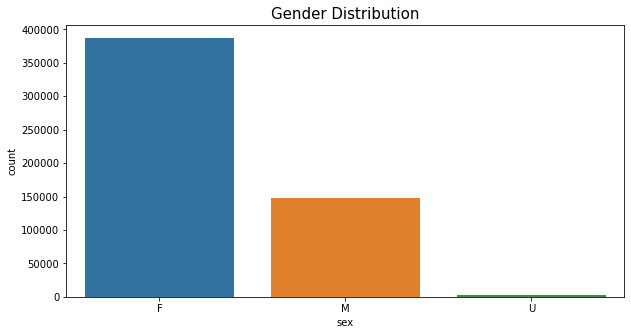

In [16]:
# Plot gender distribution
plt.figure(figsize=(10,5))
sns.countplot(x='sex', data=df)
plt.title('Gender Distribution', fontsize=15);

In general, females tend to experience more AE as compared to males.

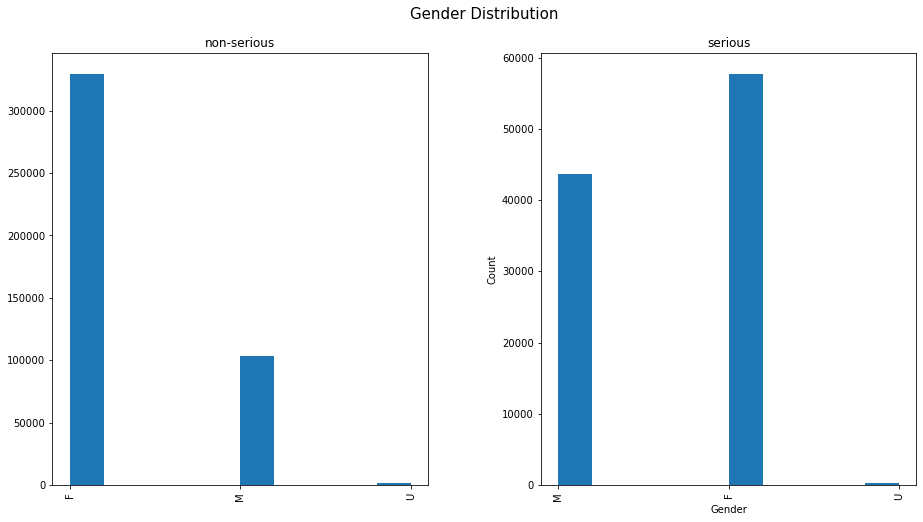

In [17]:
# Gender distribution by AE severity
df['sex'].hist(by=df['serious'], figsize=(15,8))
plt.xlabel('Gender')
plt.ylabel('Count')
plt.suptitle('Gender Distribution', fontsize=15);

A similar trend in seen for both serious and non-serious AE with females displaying a higher rate of AE in both categories.

In [18]:
### Plot some serious stuff?

#### Number of days to onset of AE


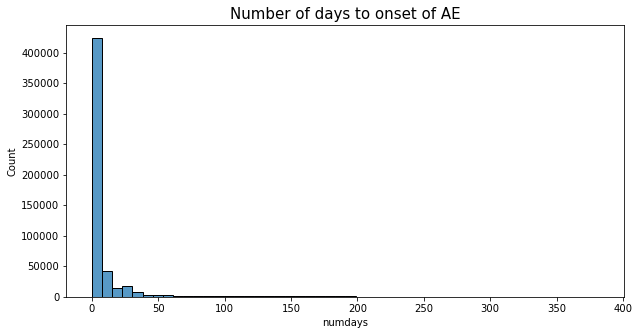

In [19]:
# Plot 'num_days'
plt.figure(figsize=(10,5))
sns.histplot(df['numdays'], bins=50)
plt.title('Number of days to onset of AE', fontsize=15);

From the graph above, we find that most AE occur within the first few days after vaccination, which is expected as most of the AE would be due to the immune response to the vaccine.

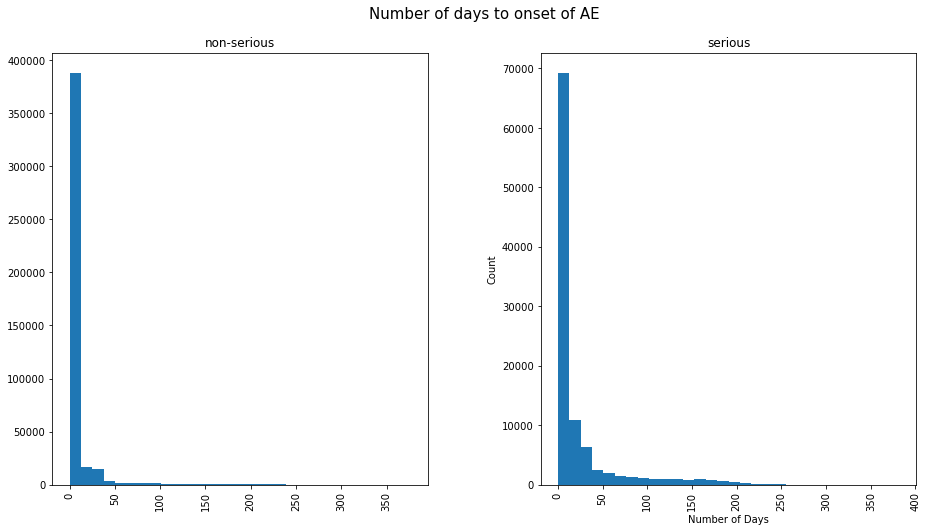

In [20]:
# Gender distribution by AE severity
df['numdays'].hist(by=df['serious'], bins=30, figsize=(15,8))
plt.xlabel('Number of Days')
plt.ylabel('Count')
plt.suptitle('Number of days to onset of AE', fontsize=15);

While both categories have a similar distribution to the general trend, we find that serious AE tend to have slightly longer onset as compared to non-serious AE.

#### Vaccine Manufacturer

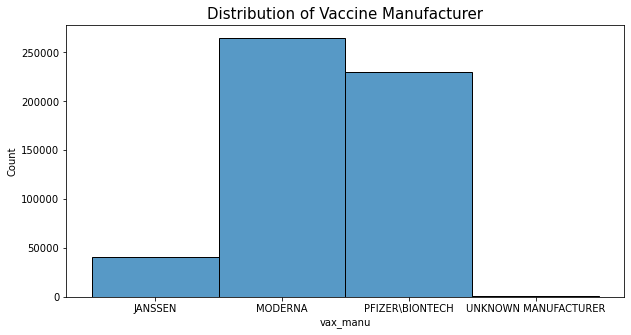

In [21]:
# Plot vaccine manufacturer
plt.figure(figsize=(10,5))
sns.histplot(df['vax_manu'].sort_values(ascending=True))
plt.title('Distribution of Vaccine Manufacturer', fontsize=15);

Moderna had the most AE reported followed by Pfizer/BioNTech and finally Janssen. Since Janssen vaccine is not as frequently administered as the former 2 manufacturers, it is expected that we see the least cases of AE from them. Pfizer/BioNTech vaccine is the most frequently administered followed by Moderna vaccine ([source](https://www.statista.com/statistics/1198516/covid-19-vaccinations-administered-us-by-company/)). This suggests that Moderna vaccine has a higher rate of AE as compared to Pfizer/BioNTech vaccine.

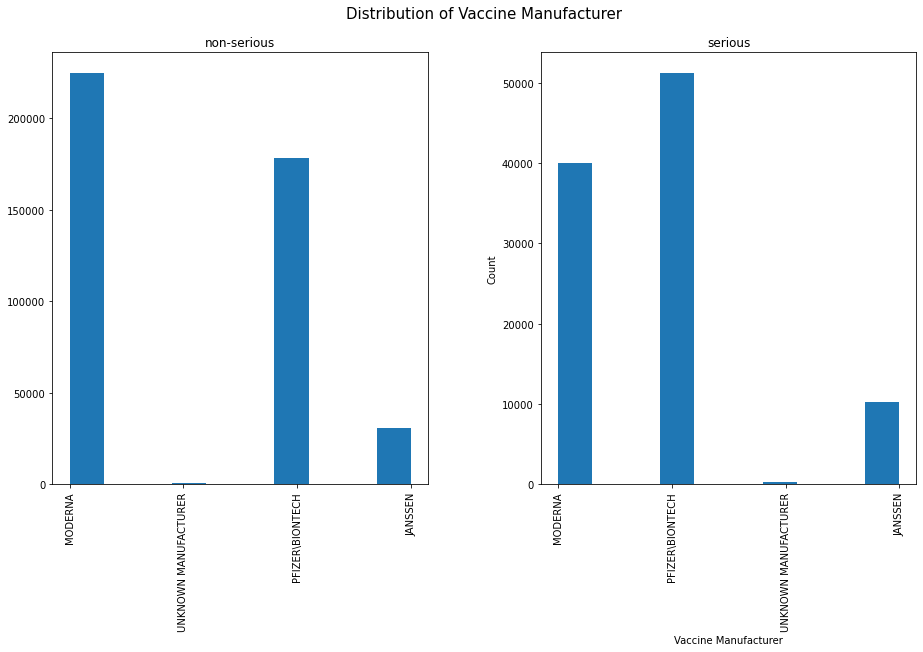

In [22]:
# Vaccine manufacturer distribution by AE severity
df['vax_manu'].hist(by=df['serious'], figsize=(15,8))
plt.xlabel('Vaccine Manufacturer')
plt.ylabel('Count')
plt.suptitle('Distribution of Vaccine Manufacturer', fontsize=15);

Despite Moderna vaccine having the highest overall rate of AE, we find that Moderna vaccine does have the highest number of cases for non-serious AE while Pfizer/BioNTech vaccine has the highest number of cases of serious AE.

This suggests that patients administered with the Moderna vaccine are more likely to experience non-serious AE (such as fever, injection site pain and fatigue), while patients administered with Pfizer/BioNTech vaccine are less likely to experience such symptoms.

Conversely, patients administered with the Moderna vaccine are less likely to experience serious AE (such as AE leading to hospitalisation, death or disability)as compared to patients administered with Pfizer/BioNTech vaccine.

#### Vaccine Route

For all the vaccines, the recommended route for injection is intramuscular (IM) only (Moderna ([source](https://www.modernatx.com/covid19vaccine-eua/eua-fact-sheet-providers.pdf)), Pfizer-BioNTech ([source](https://www.fda.gov/media/151707/download)), Janssen ([source](https://www.fda.gov/media/146304/download))).

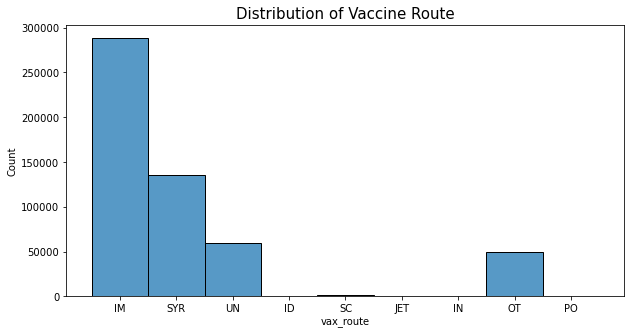

In [23]:
# Plot route of administration
plt.figure(figsize=(10,5))
sns.histplot(df['vax_route'])
plt.title('Distribution of Vaccine Route', fontsize=15);

Majority of the vaccination were administred through the recommended route (IM) with the rest falling into an unknown category (SYR - needle and syringe (not specified further), UN - unknown, OT - other). 

A small number of doses were administered SC instead of IM. IM injections are generally absorbed faster than SC injections as muscle tissues have good vascularity. SC administration may affect efficacy and potentiate local AE. We will take a further look into the route of administration based on the severity of AE below.

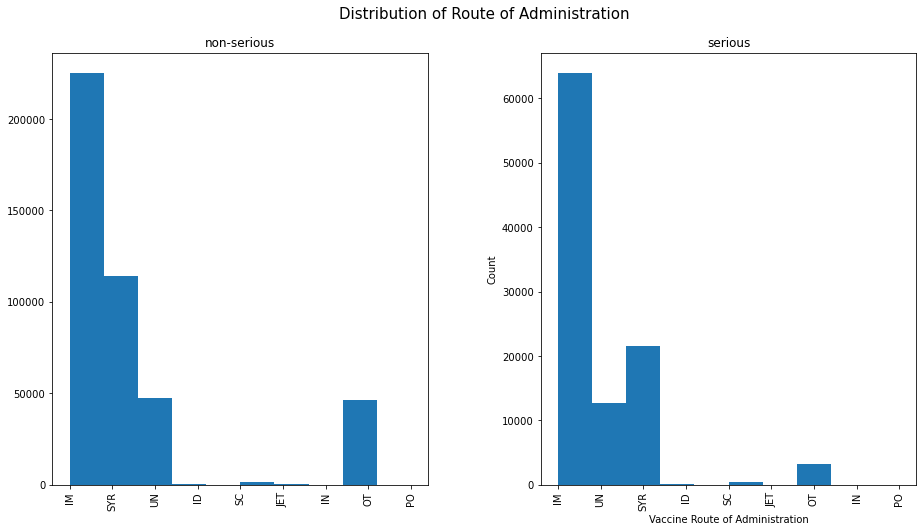

In [24]:
# Vaccine route of administration distribution by AE severity
df['vax_route'].hist(by=df['serious'], figsize=(15,8))
plt.xlabel('Vaccine Route of Administration')
plt.ylabel('Count')
plt.suptitle('Distribution of Route of Administration', fontsize=15);

In [25]:
df.groupby('vax_route')['serious'].value_counts(normalize=True)

vax_route  serious    
ID         non-serious    0.888889
           serious        0.111111
IM         non-serious    0.778844
           serious        0.221156
IN         non-serious    0.750000
           serious        0.250000
JET        non-serious    0.850000
           serious        0.150000
OT         non-serious    0.935248
           serious        0.064752
PO         serious        0.666667
           non-serious    0.333333
SC         non-serious    0.789364
           serious        0.210636
SYR        non-serious    0.841359
           serious        0.158641
UN         non-serious    0.789122
           serious        0.210878
Name: serious, dtype: float64

SC injections do not seem to result in a higher AE rate as compared to the other routes.

#### Vaccine Site

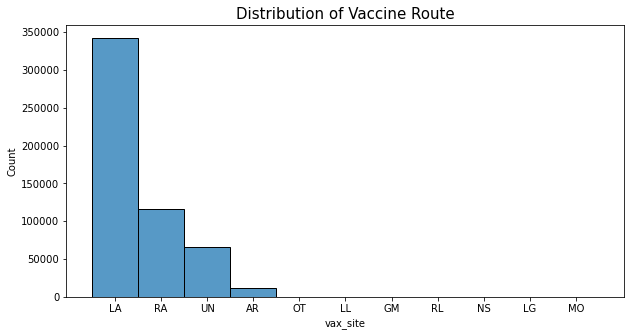

In [26]:
# Plot site of administration
plt.figure(figsize=(10,5))
sns.histplot(df['vax_site'])
plt.title('Distribution of Vaccine Route', fontsize=15);

Majority of the doses administered was to the left arm, which is expected as vaccines are typically administered to the non-dominant arm.

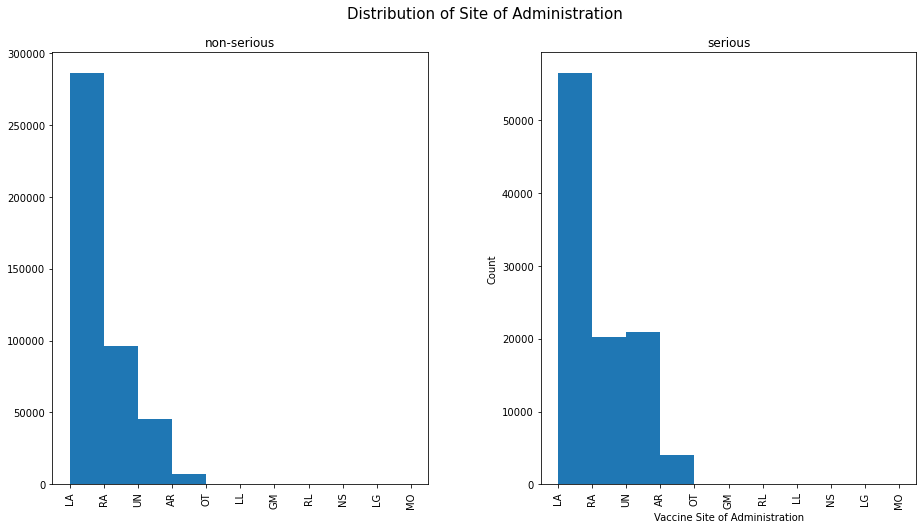

In [27]:
# Vaccine route of administration distribution by AE severity
df['vax_site'].hist(by=df['serious'], figsize=(15,8))
plt.xlabel('Vaccine Site of Administration')
plt.ylabel('Count')
plt.suptitle('Distribution of Site of Administration', fontsize=15);

There doesn't seem to be any correlation between the vaccine site and severity of AE.

### Text Columns

The following columns will be processed for visualisation: `symptom_text`, `other_meds`, `history` and `allergies`.

#### Pre-processing of text columns
1. Removing punctuations
2. Tokenization
3. Remove stopwords
4. Stemming
5. Lemmatizing

#### Stemming vs Lemmatizing
Let's compare the difference between both to see which produces a more desirable output.

In [28]:
# Preparing text for stemming and lemmatizing by removing punctuations, removing non-words and tokenizing words
def test(text):
    
    # store character only if it's not a punctuation
    text_clean = "".join([char for char in text if char not in string.punctuation])
    
    # \W matches any non-word character
    # Add a + in case there are 2 or more spaces between certain words
    tokens = re.split('\W+', text_clean)
    
    return tokens
    
df['symptom_text_tokenized'] = df['symptom_text'].apply(lambda x: test(x))
df.head()

,vaers_id,age_yrs,sex,symptom_text,died,l_threat,hospital,hospdays,x_stay,disable,recovd,numdays,v_adminby,other_meds,history,form_vers,birth_defect,er_ed_visit,allergies,symptom1,symptom2,symptom3,symptom4,symptom5,vax_type,vax_manu,vax_dose_series,vax_route,vax_site,vax_name,serious,ime,symptom_text_tokenized
0,916612.0,71.0,F,Left side of face became numb including to beh...,0.0,0.0,0.0,0.0,0.0,0.0,U,0.0,PVT,levothyroxine mcg day estradiol mg day,Graves Disease,2.0,0.0,0.0,penicillin toradol methimazole,Ear pain,Hypoaesthesia,NaN,NaN,NaN,COVID19,MODERNA,0,IM,LA,COVID19 (COVID19 (MODERNA)),non-serious,0,"[Left, side, of, face, became, numb, including..."
1,916641.0,44.0,F,Vertigo every evening when lying down and ever...,0.0,0.0,0.0,0.0,0.0,0.0,N,0.0,PVT,multivitamin D baby aspirin,none,2.0,0.0,0.0,latex sulfa drugs,Vertigo,NaN,NaN,NaN,NaN,COVID19,MODERNA,0,IM,RA,COVID19 (COVID19 (MODERNA)),non-serious,0,"[Vertigo, every, evening, when, lying, down, a..."
2,916702.0,70.0,F,body aches and stomach ache,0.0,0.0,0.0,0.0,0.0,0.0,N,31.0,PVT,Triamterene HCTZ Montelukast Celecoxib Aller T...,asthma when I get a cold,2.0,0.0,0.0,too much cordosone,Abdominal pain upper,Pain,NaN,NaN,NaN,COVID19,MODERNA,0,SYR,UN,COVID19 (COVID19 (MODERNA)),non-serious,0,"[body, aches, and, stomach, ache]"
3,917195.0,47.0,F,H a diarrhea SEVERE joint pain all through bo...,0.0,0.0,0.0,0.0,0.0,0.0,N,0.0,PVT,None,Serious episode of covid,2.0,0.0,0.0,None,Arthralgia,Chills,Diarrhoea,Fatigue,Nausea,COVID19,MODERNA,0,UN,RA,COVID19 (COVID19 (MODERNA)),non-serious,0,"[, H, a, diarrhea, SEVERE, joint, pain, all, t..."
4,917195.0,47.0,F,H a diarrhea SEVERE joint pain all through bo...,0.0,0.0,0.0,0.0,0.0,0.0,N,0.0,PVT,None,Serious episode of covid,2.0,0.0,0.0,None,Pyrexia,NaN,NaN,NaN,NaN,COVID19,MODERNA,0,UN,RA,COVID19 (COVID19 (MODERNA)),non-serious,0,"[, H, a, diarrhea, SEVERE, joint, pain, all, t..."


In [29]:
# Stemming of words with Porter stemmer

import nltk
ps = nltk.PorterStemmer()

def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text

df['symptom_text_stemmed'] = df['symptom_text_tokenized'].apply(lambda x: stemming(x))

df.head()

,vaers_id,age_yrs,sex,symptom_text,died,l_threat,hospital,hospdays,x_stay,disable,recovd,numdays,v_adminby,other_meds,history,form_vers,birth_defect,er_ed_visit,allergies,symptom1,symptom2,symptom3,symptom4,symptom5,vax_type,vax_manu,vax_dose_series,vax_route,vax_site,vax_name,serious,ime,symptom_text_tokenized,symptom_text_stemmed
0,916612.0,71.0,F,Left side of face became numb including to beh...,0.0,0.0,0.0,0.0,0.0,0.0,U,0.0,PVT,levothyroxine mcg day estradiol mg day,Graves Disease,2.0,0.0,0.0,penicillin toradol methimazole,Ear pain,Hypoaesthesia,NaN,NaN,NaN,COVID19,MODERNA,0,IM,LA,COVID19 (COVID19 (MODERNA)),non-serious,0,"[Left, side, of, face, became, numb, including...","[left, side, of, face, becam, numb, includ, to..."
1,916641.0,44.0,F,Vertigo every evening when lying down and ever...,0.0,0.0,0.0,0.0,0.0,0.0,N,0.0,PVT,multivitamin D baby aspirin,none,2.0,0.0,0.0,latex sulfa drugs,Vertigo,NaN,NaN,NaN,NaN,COVID19,MODERNA,0,IM,RA,COVID19 (COVID19 (MODERNA)),non-serious,0,"[Vertigo, every, evening, when, lying, down, a...","[vertigo, everi, even, when, lie, down, and, e..."
2,916702.0,70.0,F,body aches and stomach ache,0.0,0.0,0.0,0.0,0.0,0.0,N,31.0,PVT,Triamterene HCTZ Montelukast Celecoxib Aller T...,asthma when I get a cold,2.0,0.0,0.0,too much cordosone,Abdominal pain upper,Pain,NaN,NaN,NaN,COVID19,MODERNA,0,SYR,UN,COVID19 (COVID19 (MODERNA)),non-serious,0,"[body, aches, and, stomach, ache]","[bodi, ach, and, stomach, ach]"
3,917195.0,47.0,F,H a diarrhea SEVERE joint pain all through bo...,0.0,0.0,0.0,0.0,0.0,0.0,N,0.0,PVT,None,Serious episode of covid,2.0,0.0,0.0,None,Arthralgia,Chills,Diarrhoea,Fatigue,Nausea,COVID19,MODERNA,0,UN,RA,COVID19 (COVID19 (MODERNA)),non-serious,0,"[, H, a, diarrhea, SEVERE, joint, pain, all, t...","[, h, a, diarrhea, sever, joint, pain, all, th..."
4,917195.0,47.0,F,H a diarrhea SEVERE joint pain all through bo...,0.0,0.0,0.0,0.0,0.0,0.0,N,0.0,PVT,None,Serious episode of covid,2.0,0.0,0.0,None,Pyrexia,NaN,NaN,NaN,NaN,COVID19,MODERNA,0,UN,RA,COVID19 (COVID19 (MODERNA)),non-serious,0,"[, H, a, diarrhea, SEVERE, joint, pain, all, t...","[, h, a, diarrhea, sever, joint, pain, all, th..."


In [30]:
# Lemmatizing words with WordNet lemmatizer

wn = nltk.WordNetLemmatizer()

def lemmatizing(tokenized_text):
    # return list of all lemmatized words for their corresponding words 
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

df['symptom_text_lemmatized'] = df['symptom_text_tokenized'].apply(lambda x: lemmatizing(x))

df.head()

,vaers_id,age_yrs,sex,symptom_text,died,l_threat,hospital,hospdays,x_stay,disable,recovd,numdays,v_adminby,other_meds,history,form_vers,birth_defect,er_ed_visit,allergies,symptom1,symptom2,symptom3,symptom4,symptom5,vax_type,vax_manu,vax_dose_series,vax_route,vax_site,vax_name,serious,ime,symptom_text_tokenized,symptom_text_stemmed,symptom_text_lemmatized
0,916612.0,71.0,F,Left side of face became numb including to beh...,0.0,0.0,0.0,0.0,0.0,0.0,U,0.0,PVT,levothyroxine mcg day estradiol mg day,Graves Disease,2.0,0.0,0.0,penicillin toradol methimazole,Ear pain,Hypoaesthesia,NaN,NaN,NaN,COVID19,MODERNA,0,IM,LA,COVID19 (COVID19 (MODERNA)),non-serious,0,"[Left, side, of, face, became, numb, including...","[left, side, of, face, becam, numb, includ, to...","[Left, side, of, face, became, numb, including..."
1,916641.0,44.0,F,Vertigo every evening when lying down and ever...,0.0,0.0,0.0,0.0,0.0,0.0,N,0.0,PVT,multivitamin D baby aspirin,none,2.0,0.0,0.0,latex sulfa drugs,Vertigo,NaN,NaN,NaN,NaN,COVID19,MODERNA,0,IM,RA,COVID19 (COVID19 (MODERNA)),non-serious,0,"[Vertigo, every, evening, when, lying, down, a...","[vertigo, everi, even, when, lie, down, and, e...","[Vertigo, every, evening, when, lying, down, a..."
2,916702.0,70.0,F,body aches and stomach ache,0.0,0.0,0.0,0.0,0.0,0.0,N,31.0,PVT,Triamterene HCTZ Montelukast Celecoxib Aller T...,asthma when I get a cold,2.0,0.0,0.0,too much cordosone,Abdominal pain upper,Pain,NaN,NaN,NaN,COVID19,MODERNA,0,SYR,UN,COVID19 (COVID19 (MODERNA)),non-serious,0,"[body, aches, and, stomach, ache]","[bodi, ach, and, stomach, ach]","[body, ache, and, stomach, ache]"
3,917195.0,47.0,F,H a diarrhea SEVERE joint pain all through bo...,0.0,0.0,0.0,0.0,0.0,0.0,N,0.0,PVT,None,Serious episode of covid,2.0,0.0,0.0,None,Arthralgia,Chills,Diarrhoea,Fatigue,Nausea,COVID19,MODERNA,0,UN,RA,COVID19 (COVID19 (MODERNA)),non-serious,0,"[, H, a, diarrhea, SEVERE, joint, pain, all, t...","[, h, a, diarrhea, sever, joint, pain, all, th...","[, H, a, diarrhea, SEVERE, joint, pain, all, t..."
4,917195.0,47.0,F,H a diarrhea SEVERE joint pain all through bo...,0.0,0.0,0.0,0.0,0.0,0.0,N,0.0,PVT,None,Serious episode of covid,2.0,0.0,0.0,None,Pyrexia,NaN,NaN,NaN,NaN,COVID19,MODERNA,0,UN,RA,COVID19 (COVID19 (MODERNA)),non-serious,0,"[, H, a, diarrhea, SEVERE, joint, pain, all, t...","[, h, a, diarrhea, sever, joint, pain, all, th...","[, H, a, diarrhea, SEVERE, joint, pain, all, t..."


In [31]:
df[['symptom_text_stemmed', 'symptom_text_lemmatized']].head(20)

,symptom_text_stemmed,symptom_text_lemmatized
0,"[left, side, of, face, becam, numb, includ, to...","[Left, side, of, face, became, numb, including..."
1,"[vertigo, everi, even, when, lie, down, and, e...","[Vertigo, every, evening, when, lying, down, a..."
2,"[bodi, ach, and, stomach, ach]","[body, ache, and, stomach, ache]"
3,"[, h, a, diarrhea, sever, joint, pain, all, th...","[, H, a, diarrhea, SEVERE, joint, pain, all, t..."
4,"[, h, a, diarrhea, sever, joint, pain, all, th...","[, H, a, diarrhea, SEVERE, joint, pain, all, t..."
5,"[moderna, covid, vaccin, eua, headach, nausea,...","[Moderna, covid, vaccine, EUA, headache, nause..."
6,"[moderna, covid, vaccin, eua, headach, nausea,...","[Moderna, covid, vaccine, EUA, headache, nause..."
7,"[no, advers, reaction, the, staff, were, given...","[No, adverse, reaction, the, staff, were, give..."
8,"[moderna, covid, vaccin, eua, flare, up, of, g...","[Moderna, COVID, Vaccine, EUA, Flare, up, of, ..."
9,"[moderna, covid, vaccin, eua, flare, up, of, g...","[Moderna, COVID, Vaccine, EUA, Flare, up, of, ..."


**Thoughts on Stemming vs Lemmatizing:**

Stemming is the process of reducing inflection in words to their root forms by mapping a group of words to the same stem even if the stem itself is not a valid word in a particular language. Hence, there are words that do not necessarily make sense (e.g. everi, headach and vaccin).

On the other hand, lemmatizing reduces the number of nonsensical words by ensuring that the root word (lemma) belongs to the language. A lemma is the dictionary form of a set of words, and provides better word quality (e.g. every, headache and vaccination).

Lemmatizing will be the chosen method moving forward.

In [32]:
# NLTK stopwords
stopwords = nltk.corpus.stopwords.words('english')

In [33]:
# Create function for cleaning text

def clean_text(text):
    
    # store character only if it's not a punctuation
    text_clean = "".join([char for char in text if char not in string.punctuation])
    
    # \W matches any non-word character
    # Add a + in case there are 2 or more spaces between certain words
    tokens = re.split('\W+', text_clean) 
    
    # Store in text only if word is not word in stopword
    text_nostop = [word for word in tokens if word not in stopwords]
    
    wn = nltk.WordNetLemmatizer()
    # return list of all lemmatized words for their corresponding words 
    text_lem = [wn.lemmatize(word.lower()) for word in text_nostop]
    
    return text_lem

df['clean_symptom_text'] = df['symptom_text'].apply(clean_text)
df['clean_symptom_text'] = df['clean_symptom_text'].map(str)
df[['clean_symptom_text', 'serious']].head()

,clean_symptom_text,serious
0,"['left', 'side', 'face', 'became', 'numb', 'in...",non-serious
1,"['vertigo', 'every', 'evening', 'lying', 'ever...",non-serious
2,"['body', 'ache', 'stomach', 'ache']",non-serious
3,"['', 'h', 'diarrhea', 'severe', 'joint', 'pain...",non-serious
4,"['', 'h', 'diarrhea', 'severe', 'joint', 'pain...",non-serious


### Symptom Text


In [34]:
# Creating seperate series for each category
# Taking a sample of 10,000 for visualisation (comp not able to process larger datasets)
visual_ns = df.loc[df['serious'] == 'non-serious', 'clean_symptom_text'].sample(n=10000, random_state=1)
visual_s = df.loc[df['serious'] == 'serious', 'clean_symptom_text'].sample(n=10000, random_state=1)

#### Number of words per report

<Figure size 432x3600 with 0 Axes>

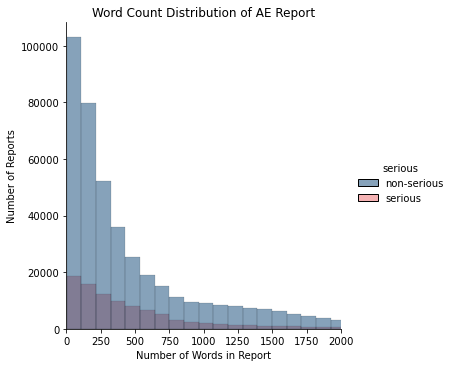

In [35]:
#word count
# Step 1: Create and apply function for word count:
def make_word_count(row):
    row['word_count'] = len(row['symptom_text'])
    return row
df = df.apply(make_word_count, axis=1)
# Step 2: Word count visualization
plt.figure(figsize=(6,50))
sns.displot(data=df, x="word_count", hue="serious", palette=['#0e4776', '#ec686a'], label=['Non-Serious', 'Serious'], bins=250, kind="hist")
plt.xlim(0, 2_000)
plt.title('Word Count Distribution of AE Report')
plt.ylabel('Number of Reports')
plt.xlabel('Number of Words in Report');

There is a right skew distribution, indicating that the most of the AE reports regardless of seriousness were shorter in length. 

#### Word Cloud Visualisation

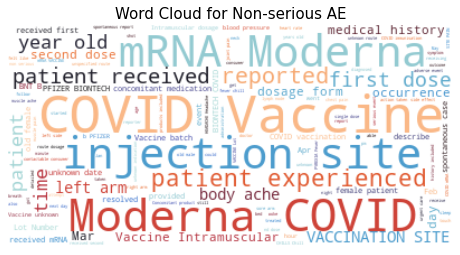

In [36]:
# Wordcloud visualisations for non-serious AE

plt.figure(figsize=(8,6))

text_1 = ' '.join(i for i in df.loc[df['serious'] == 'non-serious']['symptom_text'])

wordcloud_1 = WordCloud(stopwords=stopwords, 
                      background_color="white",
                      colormap='icefire',
                      max_words=200
                     ).generate(text_1)
plt.imshow(wordcloud_1, interpolation='bilinear')
plt.title('Word Cloud for Non-serious AE', size=15)
plt.axis("off")
plt.show()

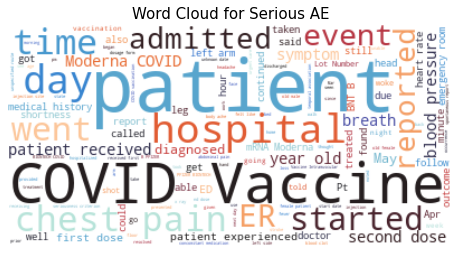

In [37]:
# Wordcloud visualisations for serious AE

plt.figure(figsize=(8,6))

text_1 = ' '.join(i for i in df.loc[df['serious'] == 'serious']['symptom_text'])

wordcloud_1 = WordCloud(stopwords=stopwords, 
                      background_color="white",
                      colormap='icefire',
                      max_words=200
                     ).generate(text_1)
plt.imshow(wordcloud_1, interpolation='bilinear')
plt.title('Word Cloud for Serious AE', size=15)
plt.axis("off")
plt.show()

**Observations from word clouds:** 
* There are several words with relatively large count in both word clouds. These words tends to pertain to the respective category.
* For non-serious AE we find words pertaining to milder symptoms such as 'injection site' possibly referring to injection site discomfort/pain.
* For serious AE words relating to more serious AE start to appear such as 'chest pain' 'hospital' and 'admitted'.
* However, we do see some common words that appear (e.g. COVID vaccine, patient) - could possibly add these as customized stopwords when processing data.
* Overall, the unique words for each category could provide good predictive ability to the predictive model.

### Vectorization Visualisation
* CVEC (Count Vectorization)
* TF-IDF (Term Frequency-Inverse Document Frequency)

#### Count Vectorizer 

Count Vectorizer converts words into document-term matrix where each row represents a AE record and each column represents a word in the record. Each cell in the matrix represents the word count in the record. The column names represent the unique words used in this dataset.

In [38]:
# Create function for CVEC vector visualisation
def cvec_ngram(range_value):
    
    # Instantiate Vectorizer
    cvec_visual = CountVectorizer(ngram_range=(range_value, range_value))
    
    # Creat df based on vectorizer
    ns_visual = cvec_visual.fit_transform(visual_ns)
    ns_visual_df = pd.DataFrame(ns_visual.todense(), columns=cvec_visual.get_feature_names())
    s_visual = cvec_visual.fit_transform(visual_s)
    s_visual_df = pd.DataFrame(s_visual.todense(), columns=cvec_visual.get_feature_names())
    
    # Plot bar graph
    plt.figure(figsize=(9,4))
    
    plt.subplot(1, 2, 1)
    ns_visual_df.sum().sort_values(ascending=False).head(20).plot(kind='barh');
    plt.title('Top 20 words in Non-serious AE (CVEC)')
    plt.xlabel('Count(CVEC)')
    plt.ylabel('Words')
    
    plt.subplot(1, 2, 2)
    s_visual_df.sum().sort_values(ascending=False).head(20).plot(kind='barh');
    plt.title('Top 20 words in Serious AE (CVEC)')
    plt.xlabel('Count(CVEC)')
    plt.ylabel('Words')
    
    plt.tight_layout()

#### TF-IDF

TF-IDF is a numerical statistic intended to reflect the importance of a word in relation to the document in a corpus. Similar to Count Vectorizer, each row represents a AE record and each column represents a word in the record. However, each cell represents a weighting meant to represent how important a word is to a document.

The TF-IDF value increases proportionally to the number of times a word appears in the document and is offset by the number of documents in the corpus that contain the word, hence adjusting for words that appear more frequently in general.

In [39]:
# Create function for TD-IDF vectorizer visualisation
def tvec_ngram(range_value):
    
    # Instantiate Vectorizer
    tvec_visual = TfidfVectorizer(ngram_range=(range_value, range_value))
    
    # Creat df based on vectorizer
    ns_visual = tvec_visual.fit_transform(visual_ns)
    ns_visual_df = pd.DataFrame(ns_visual.todense(), columns=tvec_visual.get_feature_names())
    s_visual = tvec_visual.fit_transform(visual_s)
    s_visual_df = pd.DataFrame(s_visual.todense(), columns=tvec_visual.get_feature_names())
    
    # Plot bar graph
    plt.figure(figsize=(9,4))
    
    plt.subplot(1, 2, 1)
    ns_visual_df.sum().sort_values(ascending=False).head(20).plot(kind='barh');
    plt.title('Top 20 words in Non-serious AE (TVEC)')
    plt.xlabel('Frequency (TVEC)')
    plt.ylabel('Words')
    
    plt.subplot(1, 2, 2)
    s_visual_df.sum().sort_values(ascending=False).head(20).plot(kind='barh');
    plt.title('Top 20 words in Serious AE (TVEC)')
    plt.xlabel('Frequency (TVEC)')
    plt.ylabel('Words')
    
    plt.tight_layout()

#### Unigram

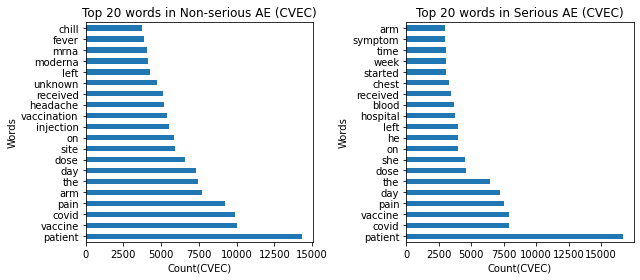

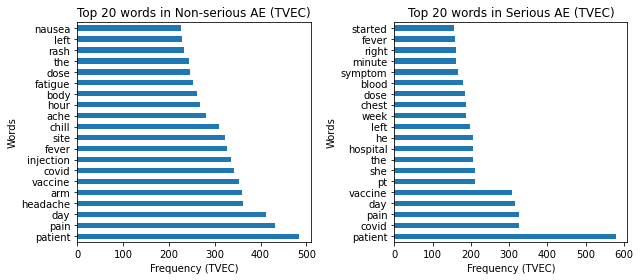

In [40]:
cvec_ngram(1)
tvec_ngram(1)

**Observations:**
* Common words across all unigrams include 'patient', 'covid', 'vaccine'. This may be attributed to the fact that these words are general terms used while describing both types of adverse events. 
* Though there are commonalities in both unigrams, there are also words that are unique to each category. As expected, for serious AE, words pertaining to more serious symptoms tend to surface (e.g. 'chest', 'blood', 'hospital') while for non-serious AE the words tend to pertain to milder symptoms (e.g. 'arm', 'headache', 'fever').

#### Bigram

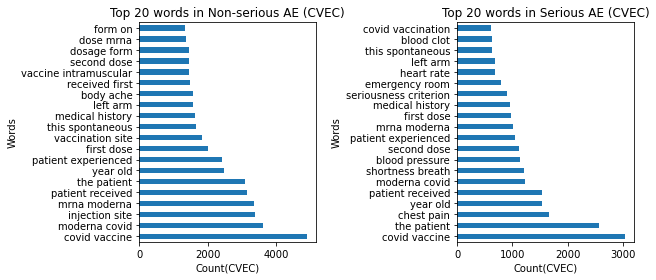

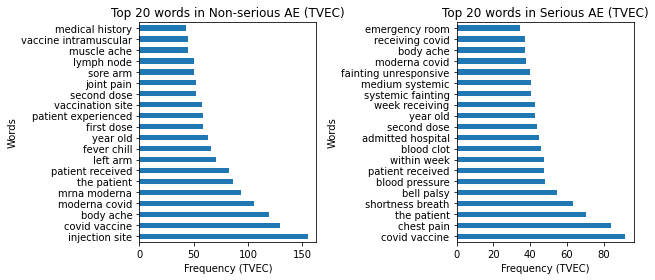

In [41]:
cvec_ngram(2)
tvec_ngram(2)

**Observations:**
* The bigrams show more distinct difference between the top words between each category.
* For serious AE, we see word pairs like 'chest pain', 'shortness breath', 'blood pressure' which are symptoms that possibly signal to more severe conditions such as a myocardial infarction. On the other hand, non-serious AE yielded word pairs such as 'injection site', 'body ache', 'fever chill' which are milder expected AE.
* In both bigrams, we find some common pairs such as 'covid vaccine', 'the patient', 'moderna covid', 'year old' which do not have much relation to severity, hence we will add them to the list of additional stopwords.

#### Trigram

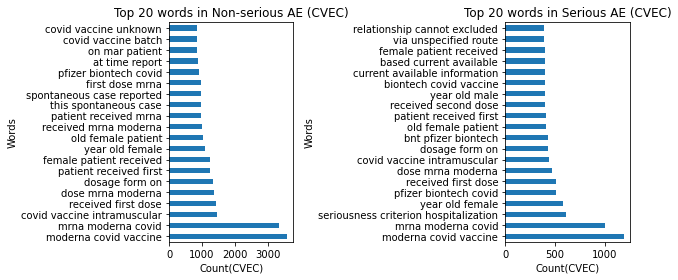

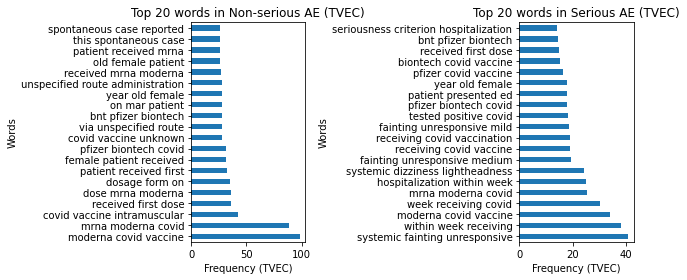

In [42]:
cvec_ngram(3)
tvec_ngram(3)

**Observations:**
* From the trigram, we find certain themes for each category.
* For serious AE, we find 3 out of the top 5 referencing AE occuring within the week 'within week receiving', 'week receiving covid' and 'hospitalization within week'. This suggests that serious AE tend to occur within the first week of receiving the vaccine.
* For non-serious AE, we find more trigrams pertaining to the route of administration, such as 'covid vaccine intramuscular', 'via unspecified route' and 'unspecified route of administration. This could be due to most non-serious AE relating to injection site pain/discomfort, hence mention of the route of administration is more common in these reports. 

### Create new stopwords

In [43]:
# # Add new stopwords based on our EDA
# new_stopwords = ['moderna', 'covid', 'mrna', 'vaccine', 'the', 'patient', 'pfizer', 'biontech']
# custom_stopwords = stopwords + new_stopwords 
# custom_stopwords[-10:]

In [44]:
# Create list of custom stopwords
custom_stopwords = nltk.corpus.stopwords.words('english')

stopword_list = ['moderna', 'covid', 'mrna', 'vaccine', 'the', 'patient', 'pfizer', 
                 'biontech', 'nan', 'none', 'mg', 'medical', 'history', 'allergy', 
                 'year', 'old']

custom_stopwords.extend(stopword_list)

wn = nltk.WordNetLemmatizer()

def clean_text_custom(text):
    
    # store character only if it's not a punctuation
    text_clean = "".join([char for char in text if char not in string.punctuation])
    
    # \W matches any non-word character
    # Add a + in case there are 2 or more spaces between certain words
    tokens = re.split('\W+', text_clean)
    
    # Removes all empty strings, e.g. ''
    tokens = [word for word in tokens if word]
   
    # Apply lemmatisation, lowercasing and stopwords exclusion within the same step.
    tokens = [wn.lemmatize(word.lower()) for word in tokens if word.lower() not in custom_stopwords] 
     
    return tokens

In [45]:
# Apply function with new stopwords
df['clean_symptom_text'] = df['symptom_text'].apply(clean_text_custom)
df['clean_symptom_text'] = df['clean_symptom_text'].map(str)
df[['clean_symptom_text', 'serious']].head()

,clean_symptom_text,serious
0,"['left', 'side', 'face', 'became', 'numb', 'in...",non-serious
1,"['vertigo', 'every', 'evening', 'lying', 'ever...",non-serious
2,"['body', 'ache', 'stomach', 'ache']",non-serious
3,"['h', 'diarrhea', 'severe', 'joint', 'pain', '...",non-serious
4,"['h', 'diarrhea', 'severe', 'joint', 'pain', '...",non-serious


In [46]:
custom_stopwords[-10:]

['pfizer',
 'biontech',
 'nan',
 'none',
 'mg',
 'medical',
 'history',
 'allergy',
 'year',
 'old']

In [47]:
# Reassign visualisation df with clean text including new stop words
visual_ns = df.loc[df['serious'] == 'non-serious', 'clean_symptom_text'].sample(n=10000, random_state=1)
visual_s = df.loc[df['serious'] == 'serious', 'clean_symptom_text'].sample(n=10000, random_state=1)

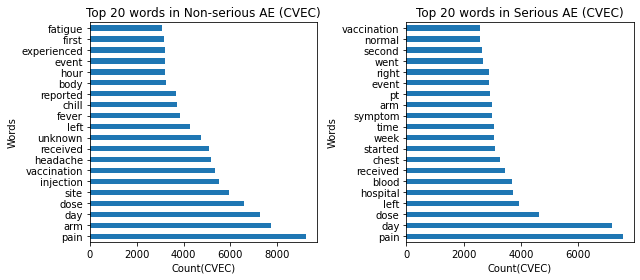

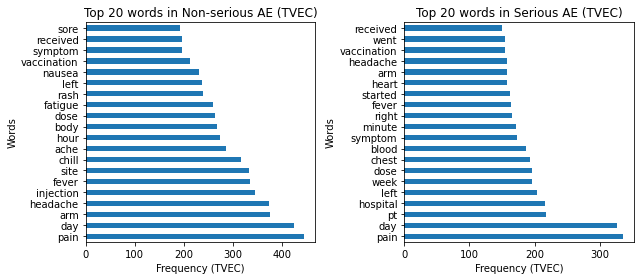

In [48]:
# Re-look at our unigram, bigram and trigram as they provide more meaningful information
cvec_ngram(1)
tvec_ngram(1)

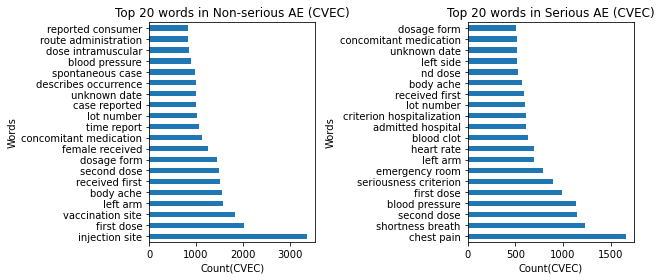

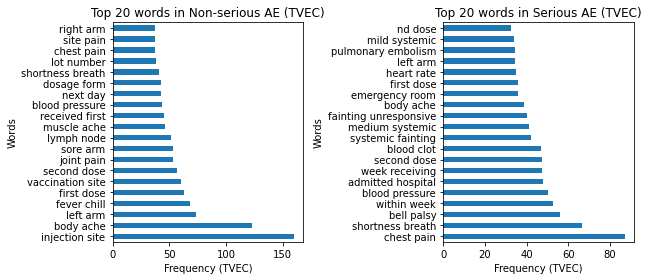

In [49]:
cvec_ngram(2)
tvec_ngram(2)

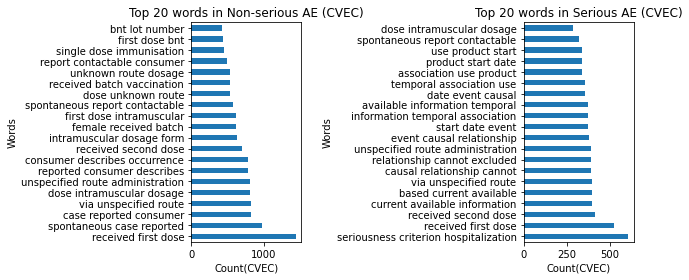

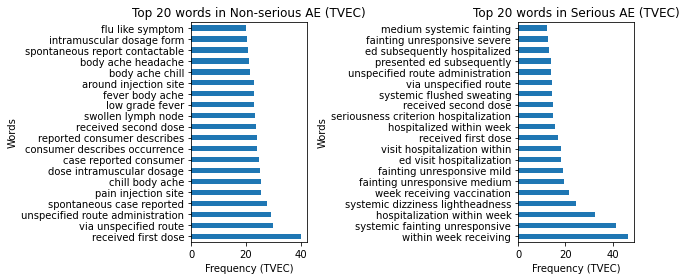

In [50]:
cvec_ngram(3)
tvec_ngram(3)

**Observations after removing additional stopwords:**
* The unigram looks quite similar to those before removal of additional stopwords.
* However, we find the addition of new stop words provides more meaningful bigram and trigram.
* For non-serious AE we find specific AE mentioned in the bigram such as 'body ache', 'fever chill', 'joint pain' and 'sore arm'. We find a similar trend for trigram from phrases including 'chill body ache', 'swollen lymph node' and 'low grade fever'.
* For serious AE we see bigram such as 'chest pain', 'shortness breath', 'bell palsy', 'admitted hospital', 'blood clot' that are references to serious AE. For trigrams we see an interesting pattern with phrases such as 'systemic fainting unresponsive', 'systemic dizziness lightheadness', 'fainting unresponsive medium', 'fainting unresponsive mild' which have the common theme of fainting. This may be due to the fact that if someone faints and is unresponsive, they may be rushed to the emergency department and hospitalised for observation (hospitalisation being a serious criterion) leading them being classified as serious. 
* We also see mentioning of timeframe for serious AE e.g. 'within week receiving', 'hospitalization within week' and 'week receiving vaccination' which agrees with the findings from above.

#### Final thoughts on N-grams

From the various n-grams, we see that unigram, as the least computationally intensive, provides us with the least meaningful data as there seems to be the most overlap of words between the 2 categories. With bi-gram and tri-gram, we are able to see distinctive phrase from the respective categories which would be useful in crafting a predictive model. Since bi-gram and tri-gram both give us more uesful phrases, we will move forward with bi-gram for modelling as it is less computationally expensive compared to tri-gram.

The difference in word vectors from CVEC and TVEC does not seem to be significant as the top hits tend to be similar to each other. Both vectorizers will be utilized when building the models to see if scores can be optimized based on the vectorizer used.

#### Other medications

In [51]:
# Let's take a look at the other medications distribution for both categories
# Clean text with function
df['other_meds'] = df['other_meds'].map(str)
df['clean_other_meds'] = df['other_meds'].apply(clean_text_custom)
df['clean_other_meds'] = df['clean_other_meds'].map(str)

# Creating seperate series for each category
# Taking a sample of 10,000 for visualisation (comp not able to process larger datasets)
visual_ns = df.loc[df['serious'] == 'non-serious', 'clean_other_meds'].sample(n=10000, random_state=1)
visual_s = df.loc[df['serious'] == 'serious', 'clean_other_meds'].sample(n=10000, random_state=1)

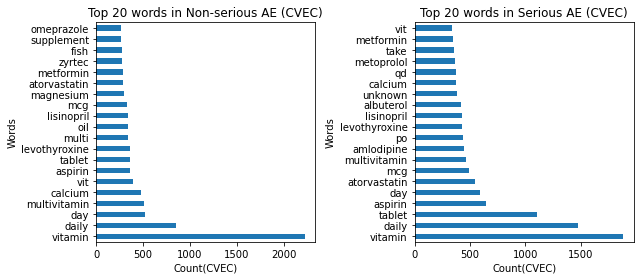

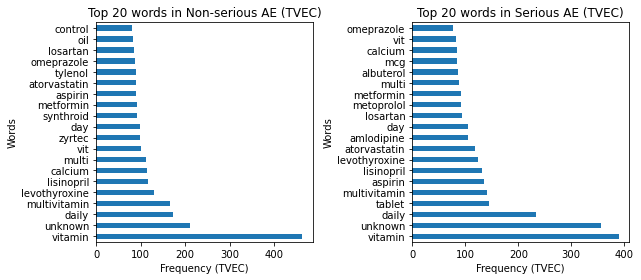

In [52]:
# Since medication names generally consist of 1 word with a maximum of 2 words
# We'll take a look at unigram and bigram for medications
cvec_ngram(1)
tvec_ngram(1)

**Observations:**
* We find the top 'medication' taken is a vitamin supplement in both categories.
* Top words for non-serious: levothyroxine, lisinopril, zyrtec, metformin, aspirin, atorvastatin, tylenol, omeprazole, losartan
* Top words for serious: aspirin, lisinopril, lecothryoxine, atorvastatin, amlodipine, losartan, metoprolol, metformin, albuterol, omeprazole
* There does not seem to be any medications or class of medication that seem to have a correlation a particular category.
* The common medications seen then to be chronic in nature (e.g. 'lisinopril', 'atorvastatin') or commonly prescribed for minor ailments (e.g. 'tylenol', 'zyrtec')

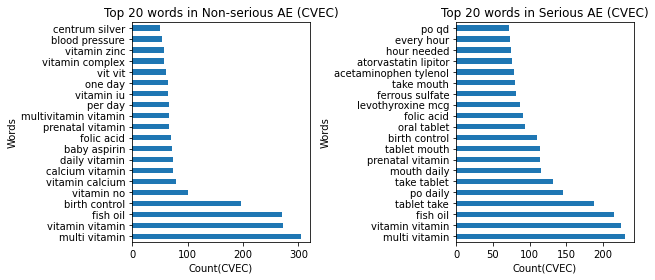

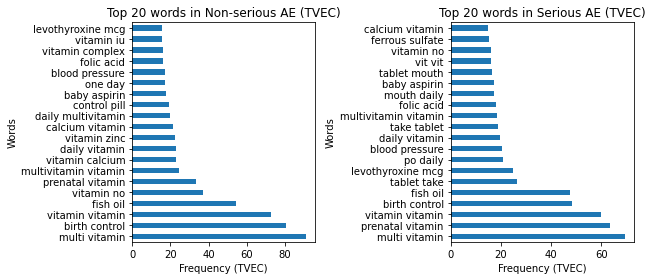

In [53]:
cvec_ngram(2)
tvec_ngram(2)

**Observations:**
* The bigram shows us that most concomitant medications are indeed health supplements such as 'multi vitamin', 'fish oil' and 'prenatal vitamin'.
* Most of the phrases from the bigram have appeared within the unigram.
* Interestingly, we find birth control in both categories of bigram despite not being mentioned in the unigram.
* An area for possible study would be to look into the relationship between birth control and incidence of AE.

#### Medical History

In [54]:
# Let's take a look at the medical history distribution for both categories
# Clean text with function
df['history'] = df['history'].map(str)
df['clean_history'] = df['history'].apply(clean_text_custom)
df['clean_history'] = df['clean_history'].map(str)

# Creating seperate series for each category
# Taking a sample of 10,000 for visualisation (comp not able to process larger datasets)
visual_ns = df.loc[df['serious'] == 'non-serious', 'clean_history'].sample(n=10000, random_state=1)
visual_s = df.loc[df['serious'] == 'serious', 'clean_history'].sample(n=10000, random_state=1)

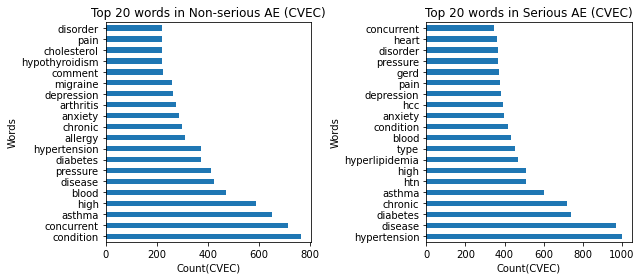

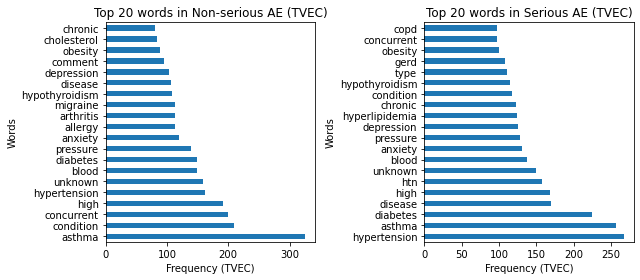

In [55]:
cvec_ngram(1)
tvec_ngram(1)

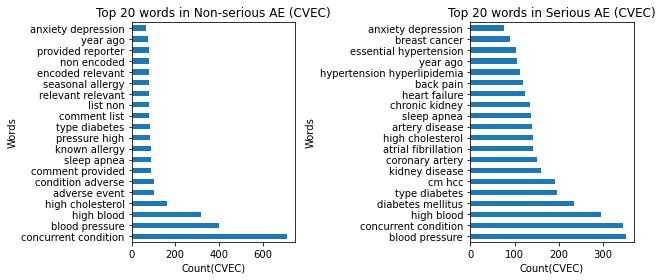

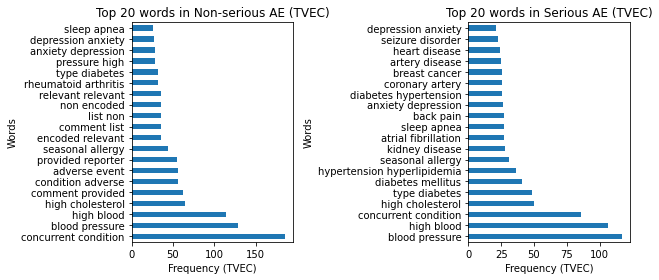

In [56]:
cvec_ngram(2)
tvec_ngram(2)

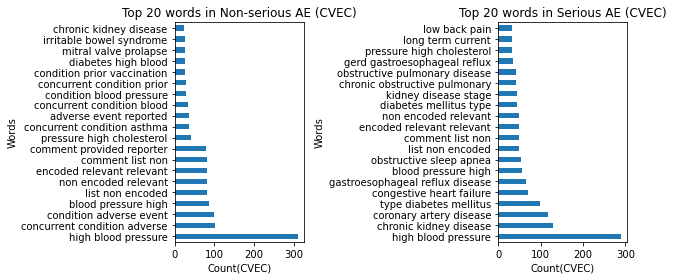

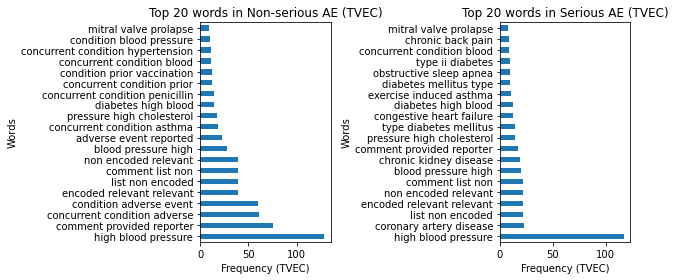

In [57]:
cvec_ngram(3)
tvec_ngram(3)

**Observations:**
* The concomitant disease seem to be in line with the population statistics ([source](https://www.cdc.gov/chronicdisease/resources/infographic/chronic-diseases.htm)) with top chronic diseases such as 'hypertension/high blood pressure', 'high cholesterol' and 'diabetes' appearing in all the N-grams.

#### Previous allergies

In [58]:
# Let's take a look at the previous allergies distribution for both categories
# Clean text with function
df['allergies'] = df['allergies'].map(str)
df['clean_allergies'] = df['allergies'].apply(clean_text_custom)
df['clean_allergies'] = df['clean_allergies'].map(str)

# Creating seperate series for each category
# Taking a sample of 10,000 for visualisation (comp not able to process larger datasets)
visual_ns = df.loc[df['serious'] == 'non-serious', 'clean_allergies'].sample(n=10000, random_state=1)
visual_s = df.loc[df['serious'] == 'serious', 'clean_allergies'].sample(n=10000, random_state=1)

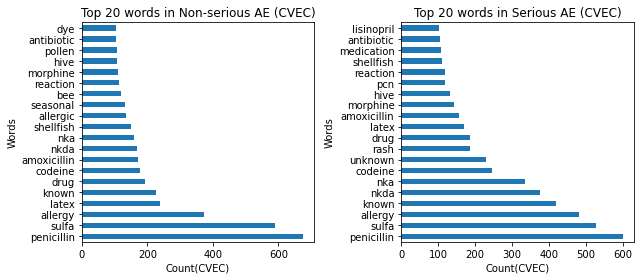

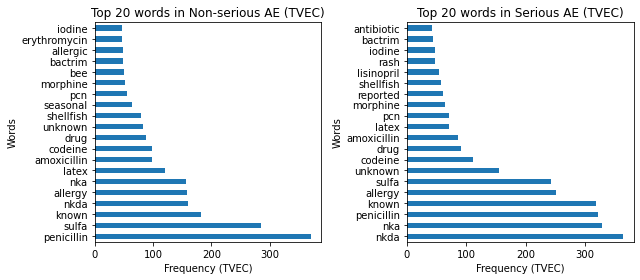

In [59]:
cvec_ngram(1)
tvec_ngram(1)

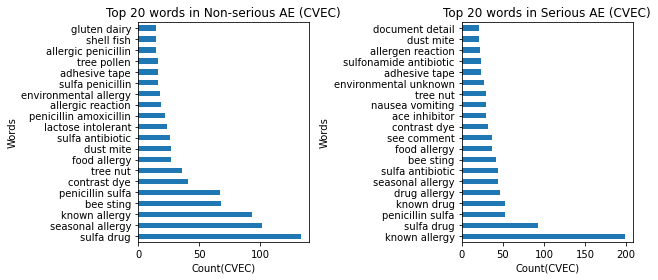

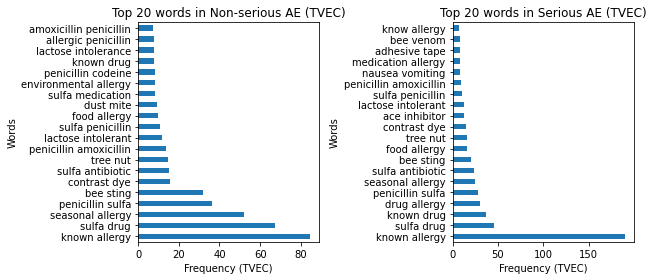

In [60]:
cvec_ngram(2)
tvec_ngram(2)

**Observations:**
* The top allergies from the N-grams correspond to the most common food, drug and outdoor allergies (e.g. 'penicillin', 'sulfa drug', 'tree nut', 'bee sting') ([source](https://www.aafa.org/allergy-facts/)).

#### Final thoughts on Text Columns
Out of the 4 text columns, `symptom_text` is the only column that seem to have any predictive power with the various N-grams. `other_meds`, `history` and `allergies` seem to have similar words and phrases between the 2 categories, making it difficult to train a model with these columns to differentiate between serious and non-serious AE.

Taking into consideration all the aforementioned points, `symptom_text` will be used to train the model.

In [61]:
# Map serious column back to 0/1 in preperation for modelling
df['serious'] = df['serious'].map({'non-serious':0, 'serious':1})
df.head()

,vaers_id,age_yrs,sex,symptom_text,died,l_threat,hospital,hospdays,x_stay,disable,recovd,numdays,v_adminby,other_meds,history,form_vers,birth_defect,er_ed_visit,allergies,symptom1,symptom2,symptom3,symptom4,symptom5,vax_type,vax_manu,vax_dose_series,vax_route,vax_site,vax_name,serious,ime,symptom_text_tokenized,symptom_text_stemmed,symptom_text_lemmatized,clean_symptom_text,word_count,clean_other_meds,clean_history,clean_allergies
0,916612.0,71.0,F,Left side of face became numb including to beh...,0.0,0.0,0.0,0.0,0.0,0.0,U,0.0,PVT,levothyroxine mcg day estradiol mg day,Graves Disease,2.0,0.0,0.0,penicillin toradol methimazole,Ear pain,Hypoaesthesia,NaN,NaN,NaN,COVID19,MODERNA,0,IM,LA,COVID19 (COVID19 (MODERNA)),0,0,"[Left, side, of, face, became, numb, including...","[left, side, of, face, becam, numb, includ, to...","[Left, side, of, face, became, numb, including...","['left', 'side', 'face', 'became', 'numb', 'in...",208,"['levothyroxine', 'mcg', 'day', 'estradiol', '...","['graf', 'disease']","['penicillin', 'toradol', 'methimazole']"
1,916641.0,44.0,F,Vertigo every evening when lying down and ever...,0.0,0.0,0.0,0.0,0.0,0.0,N,0.0,PVT,multivitamin D baby aspirin,none,2.0,0.0,0.0,latex sulfa drugs,Vertigo,NaN,NaN,NaN,NaN,COVID19,MODERNA,0,IM,RA,COVID19 (COVID19 (MODERNA)),0,0,"[Vertigo, every, evening, when, lying, down, a...","[vertigo, everi, even, when, lie, down, and, e...","[Vertigo, every, evening, when, lying, down, a...","['vertigo', 'every', 'evening', 'lying', 'ever...",264,"['multivitamin', 'baby', 'aspirin']",[],"['latex', 'sulfa', 'drug']"
2,916702.0,70.0,F,body aches and stomach ache,0.0,0.0,0.0,0.0,0.0,0.0,N,31.0,PVT,Triamterene HCTZ Montelukast Celecoxib Aller T...,asthma when I get a cold,2.0,0.0,0.0,too much cordosone,Abdominal pain upper,Pain,NaN,NaN,NaN,COVID19,MODERNA,0,SYR,UN,COVID19 (COVID19 (MODERNA)),0,0,"[body, aches, and, stomach, ache]","[bodi, ach, and, stomach, ach]","[body, ache, and, stomach, ache]","['body', 'ache', 'stomach', 'ache']",27,"['triamterene', 'hctz', 'montelukast', 'celeco...","['asthma', 'get', 'cold']","['much', 'cordosone']"
3,917195.0,47.0,F,H a diarrhea SEVERE joint pain all through bo...,0.0,0.0,0.0,0.0,0.0,0.0,N,0.0,PVT,None,Serious episode of covid,2.0,0.0,0.0,None,Arthralgia,Chills,Diarrhoea,Fatigue,Nausea,COVID19,MODERNA,0,UN,RA,COVID19 (COVID19 (MODERNA)),0,0,"[, H, a, diarrhea, SEVERE, joint, pain, all, t...","[, h, a, diarrhea, sever, joint, pain, all, th...","[, H, a, diarrhea, SEVERE, joint, pain, all, t...","['h', 'diarrhea', 'severe', 'joint', 'pain', '...",145,[],"['serious', 'episode']",[]
4,917195.0,47.0,F,H a diarrhea SEVERE joint pain all through bo...,0.0,0.0,0.0,0.0,0.0,0.0,N,0.0,PVT,None,Serious episode of covid,2.0,0.0,0.0,None,Pyrexia,NaN,NaN,NaN,NaN,COVID19,MODERNA,0,UN,RA,COVID19 (COVID19 (MODERNA)),0,0,"[, H, a, diarrhea, SEVERE, joint, pain, all, t...","[, h, a, diarrhea, sever, joint, pain, all, th...","[, H, a, diarrhea, SEVERE, joint, pain, all, t...","['h', 'diarrhea', 'severe', 'joint', 'pain', '...",145,[],"['serious', 'episode']",[]


In [62]:
df.columns

Index(['vaers_id', 'age_yrs', 'sex', 'symptom_text', 'died', 'l_threat',
       'hospital', 'hospdays', 'x_stay', 'disable', 'recovd', 'numdays',
       'v_adminby', 'other_meds', 'history', 'form_vers', 'birth_defect',
       'er_ed_visit', 'allergies', 'symptom1', 'symptom2', 'symptom3',
       'symptom4', 'symptom5', 'vax_type', 'vax_manu', 'vax_dose_series',
       'vax_route', 'vax_site', 'vax_name', 'serious', 'ime',
       'symptom_text_tokenized', 'symptom_text_stemmed',
       'symptom_text_lemmatized', 'clean_symptom_text', 'word_count',
       'clean_other_meds', 'clean_history', 'clean_allergies'],
      dtype='object')

In [63]:
# Drop columns not required for modelling
df = df.drop(columns=['died', 'l_threat', 'hospital', 'x_stay', 'disable', 'birth_defect', 'symptom1', 'symptom2', 'symptom3', 'symptom4', 'symptom5', 'ime', 'symptom_text_tokenized', 'symptom_text_stemmed', 'symptom_text_lemmatized'])

In [64]:
# Save df for modelling into csv file
df.to_csv('../data/final_clean_df.csv', index=False)